# The impacts of network topology on disease spread

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import sys
import queue

print ("- Diseñado en python 3")
print ("- No testeado para python 2")
print ("- Kernel en ejecución: \npython " + sys.version)

- Diseñado en python 3
- No testeado para python 2
- Kernel en ejecución: 
python 3.6.1 |Anaconda custom (64-bit)| (default, Mar 22 2017, 19:54:23) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


## Funciones de otras practicas importadas como una librería

In [3]:
%reload_ext autoreload
import lib_grafos as lg
file = open('funciones_lib_grafos.txt', 'r')
print(file.read())

def grafo_aleatorio(num_nodos, prob):
def tam_grafo(grafo):
def aleatorio(num_nodos, prob):
def indiceCluster_caminoCar(grafo):
def aleatiorio2(num_nodos, prob):
def calcula_C(grafo):
def calcula_L(grafo):
def calcula_grados(grafo):
def adyacentes(grafo, vertice):
def matrix_to_adyacent(grafo):
def calcula_grados_rapido(grafo, limit):
def get_distro(grados, tam_grafo):
def busqueda_anchura(grafo, nodo_ini=0):
def componentes_conexas(grafo):
def componentes_conexas_nodo(grafo, nodo, cola):
def aleatorio3(N, p):
def create_mundo_pequeno (num_nodos, k, probabilidad):
def mundo_pequeno (num_nodos, k, probabilidad):
def mundo_pequeno_print (num_nodos, k, probabilidad):
def libre_escala (num_inicial, num_final, num_ramas):
def libre_escala_print (num_inicial, num_final, num_ramas, l=True):

CONTRUIR GRAFOS

def grafo_aleatorio(num_nodos, prob):
def create_lattice_1D (num_nodos, k):
def rewired_1D (num_nodos, k, probabilidad): // small_word_1D(...)
def create_lattice_2D (num_nodos, k):
def re

## Objeto grafo

In [222]:
class Grafo_obj:
    def __init__(self, grafo, tipo):
        self.grafo=grafo
        self.l=-1
        self.c=-1
        self.g=-1
        self.tipo=tipo
        self.tam=lg.tam_grafo(grafo)
    def set_l(self):
        self.l=lg.calcula_L(self.grafo)
    def set_l2(self):
        self.l=lg.calcula_L2(self.grafo)
    def set_c(self):
        self.c=lg.calcula_C(self.grafo)[0]
    def set_g(self):
        self.g=sum(lg.calcula_grados_rapido(self.grafo, self.tam))/self.tam

class Enfermedad:
    def __init__(self, grafo, tam_grafo, t_latencia, t_enfermedad, p_contagio):
        self.grafo=grafo
        self.tam_grafo=tam_grafo
        self.t_latencia=t_latencia
        self.t_enfermedad=t_enfermedad
        self.p_contagio=p_contagio
        self.v_estado=[]
        self.v_times=[]
        self.contagiados=1
        self.times_contagiados=[]
        for i in range(tam_grafo):
            self.v_estado.append("Sano")
            self.v_times.append(-1)
        inicio = rd.randint(0, tam_grafo-1)
        self.v_estado[inicio]="Enfermo"
        self.v_times[inicio]=t_enfermedad
    def next_time(self,indice):
        #Actualizamos los tiempos de latencia y de enfermedad
        #Transicion de latente a enfermo y de enfermo a inmune
        for i in range(self.tam_grafo):
            if self.v_estado[i]=="Incubando" or self.v_estado[i]=="Enfermo":
                self.v_times[i]=self.v_times[i]-1
            if self.v_estado[i]=="Incubando" and self.v_times[i]==0:
                self.v_estado[i]="Enfermo"
                self.v_times[i]=self.t_enfermedad
            if self.v_estado[i]=="Enfermo" and self.v_times[i]==0:
                self.v_estado[i]="Inmune"
        #Recorremos nodos aleatoriamente para que la enfermedad se transmita a los sanos
        orden=list(range(self.tam_grafo))
        rd.shuffle(orden)
        for i in orden:
            if self.v_estado[i]=="Enfermo":
                ady = lg.adyacentes(self.grafo, i)
                for j in ady:
                    #Solo los sanos se contagian y lo hacen con una prob
                    if self.v_estado[j]=="Sano":
                        if rd.random()<self.p_contagio:
                            self.v_estado[j]="Incubando"
                            self.v_times[j]=self.t_latencia
                            self.contagiados=self.contagiados+1
        self.times_contagiados.append(self.contagiados)
    def curar(self, cantidad):
        counter=0
        while cantidad>0 and counter<100:
            i = rd.randint(0, self.tam_grafo-1)
            if self.v_estado[i]!="Inmune":
                self.v_estado[i]="Inmune"
                cantidad=cantidad-1
            counter=counter+1
            

## Grafos seleccionados

In [192]:
g_regulares=[]
g_scale_free=[]
g_lattice_1D=[]
g_lattice_2D=[]
g_rewired_1D=[]
g_rewired_2D=[]
for i in range(10):
    g_regulares.append( Grafo_obj( lg.grafo_aleatorio(500, 0.015), 'Random_p0015' ) )
for i in range(10):
    g_scale_free.append( Grafo_obj( lg.scale_free (50, 500, 4), 'Scale_free_m4' ) )
    g_rewired_1D.append( Grafo_obj( lg.rewired_1D (500, 8, 0.05), 'Rewired_1D_k8_p005' ) )
    g_rewired_2D.append( Grafo_obj( lg.rewired_2D (484, 8, 0.05), 'Rewired_2D_k8_p005' ) )#529
g_lattice_1D.append( Grafo_obj( lg.create_lattice_1D (500, 8), 'Lattice_1D_k8' ) )
g_lattice_2D.append( Grafo_obj( lg.create_lattice_2D (484, 8), 'Lattice_2D_k8' ) )
gs=[]
gs.append(g_regulares)
gs.append(g_scale_free)
gs.append(g_lattice_1D)
gs.append(g_lattice_2D)
gs.append(g_rewired_1D)
gs.append(g_rewired_2D)

## Figura 4

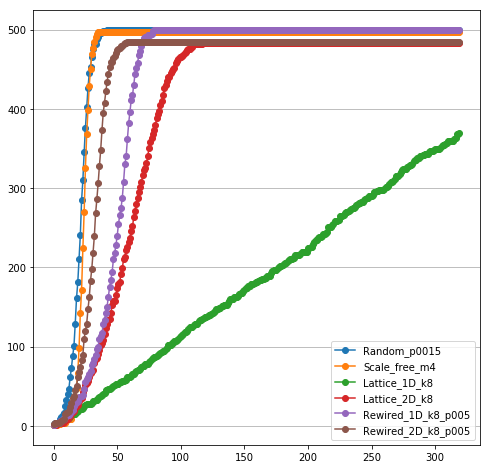

In [135]:
resultados3=[]
resultadosname3=[]
plt.figure(figsize=(8,8))
N=100
for grupo in gs:
    tmp = list(range(N))
    for gra in grupo:
        enf = Enfermedad(gra.grafo, lg.tam_grafo(gra.grafo), 4, 10, 0.1)
        for i in range(N):
            enf.next_time(i)
        for i in range(len(tmp)):
            tmp[i]+=enf.times_contagiados[i]
    for i in range(len(tmp)):
        tmp[i]=tmp[i]/N
    resultados3.append(enf.times_contagiados)
    resultadosname3.append(gra.tipo)
    plt.plot(enf.times_contagiados, 'o-', label=gra.tipo)
plt.legend()
plt.grid(axis='y')
plt.show()

## Métrica sobre la curva

In [136]:
gradientes=[]
max_sizes=[]
times=[]
for elem, names in zip(resultados3, resultadosname3):
    tmp=-1
    tmp2=-1
    tmp3=-1
    for i in range(len(elem)):
        if elem[i]>tmp2:
            tmp2=elem[i]
            tmp3=i
    max_sizes.append(tmp2)
    times.append(tmp3)
    for i in range(len(elem)-1):
        aux = elem[i+1]-elem[i]
        if aux>tmp:
            tmp=aux
    gradientes.append(tmp)

print(resultadosname)
print(gradientes)
print(max_sizes)
print(times)

['Random_p0015', 'Scale_free_m4', 'Lattice_1D_k8', 'Lattice_2D_k8', 'Rewired_1D_k8_p005', 'Rewired_2D_k8_p005']
[44, 55, 6, 11, 22, 29]
[499, 497, 369, 483, 500, 484]
[42, 35, 319, 118, 83, 58]


## Figura 5

In [137]:
print(times)

[42, 35, 319, 118, 83, 58]


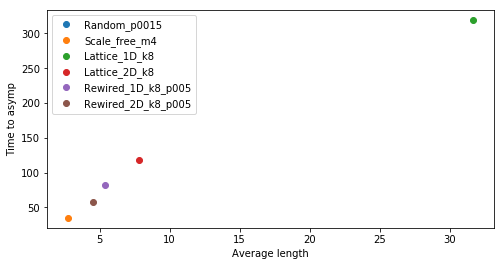

In [143]:
sumer=[]
timer=[]
plt.figure(figsize=(8,4))
lst=['Random_p0015', 'Scale_free_m4', 'Lattice_1D_k8', 'Lattice_2D_k8', 'Rewired_1D_k8_p005', 'Rewired_2D_k8_p005']
for grupo, time, name in zip(gs, times, lst):
    sume=0
    #for grafo in grupo:
        #grafo.set_l()
    for grafo in grupo:
        sume=sume+grafo.l
    sume=sume/len(grupo)
    sumer.append(sume)
    timer.append(time)
    plt.plot(sume, time, 'o',label=name)
plt.legend()
plt.xlabel('Average length')
plt.ylabel('Time to asymp')
plt.show()

## Figura 6

In [219]:
def cal_curvas(incuba, malo, p, t_curas, n_curas):
    rst=[]
    rstname=[]
    N=100
    for grupo in gs:
        tmp = list(range(N))
        for gra in grupo:
            enf = Enfermedad(gra.grafo, lg.tam_grafo(gra.grafo), incuba, malo, p)
            for i in range(N):
                enf.next_time(i)
                if i>t_curas:
                    enf.curar(n_curas)
            for i in range(len(tmp)):
                tmp[i]+=enf.times_contagiados[i]
        for i in range(len(tmp)):
            tmp[i]=tmp[i]/N
        rst.append(enf.times_contagiados)
        rstname.append(gra.tipo)
    return rst, rstname

def metricas(r, rn):
    gradientes=[]
    max_sizes=[]
    times=[]
    for elem, names in zip(r, rn):
        tmp=-1
        tmp2=-1
        tmp3=-1
        for i in range(len(elem)):
            if elem[i]>tmp2:
                tmp2=elem[i]
                tmp3=i
        max_sizes.append(tmp2)
        times.append(tmp3)
        for i in range(len(elem)-1):
            aux = elem[i+1]-elem[i]
            if aux>tmp:
                tmp=aux
        gradientes.append(tmp)
    return resultadosname, gradientes, max_sizes, times        

In [197]:
a, b = cal_curvas(2, 10, 0.1)
rname, gra, ms, ts = metricas(a, b)
print(gra)

[52, 68, 6, 19, 33, 42]


In [233]:
#probs=[0.01, 0.02, 0.04, 0.05, 0.06, 0.08, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55]
#probs=[0.1, 0.15]
probs=[1,4,8,10,12,15,18,22,25,30]
res_gra=[]
res_ms=[]
res_ts=[]
for i in range(len(probs)):
    res_gra.append([])
    res_ms.append([])
    res_ts.append([])

for i in range(len(probs)):   
    print(probs[i])
    a, b = cal_curvas(2, 10, 0.1, 5, probs[i])
    rname, gra, ms, ts = metricas(a, b)
    res_gra[i].append(gra)
    res_ms[i].append(ms)
    res_ts[i].append(ts)
    
tmp_aa=[]
for i in range(6):
    tmp_a=[]
    for j in range(len(probs)):
        tmp_a.append(res_gra[j][0][i])
    tmp_aa.append(tmp_a)
res_gra=tmp_aa

tmp_aa=[]
for i in range(6):
    tmp_a=[]
    for j in range(len(probs)):
        tmp_a.append(res_ms[j][0][i])
    tmp_aa.append(tmp_a)
res_ms=tmp_aa

tmp_aa=[]
for i in range(6):
    tmp_a=[]
    for j in range(len(probs)):
        tmp_a.append(res_ts[j][0][i])
    tmp_aa.append(tmp_a)
res_ts=tmp_aa

1
4
8
10
12
15
18
22
25
30


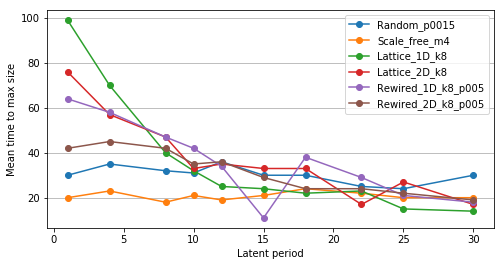

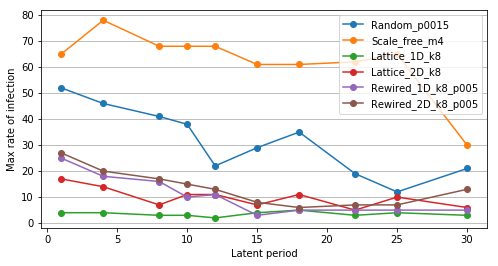

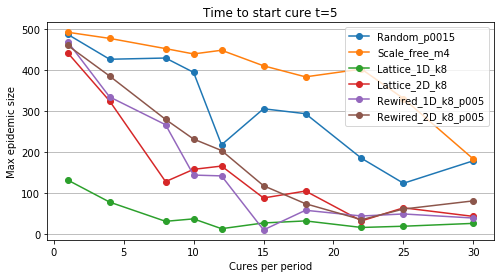

In [235]:
plt.figure(figsize=(8,4))
lst=['Random_p0015', 'Scale_free_m4', 'Lattice_1D_k8', 'Lattice_2D_k8', 'Rewired_1D_k8_p005', 'Rewired_2D_k8_p005']
for cosa, name in zip(res_ts, lst):
    plt.plot(probs, cosa, 'o-', label=name)
plt.legend()
plt.xlabel('Latent period')
plt.ylabel('Mean time to max size')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(8,4))
lst=['Random_p0015', 'Scale_free_m4', 'Lattice_1D_k8', 'Lattice_2D_k8', 'Rewired_1D_k8_p005', 'Rewired_2D_k8_p005']
for cosa, name in zip(res_gra, lst):
    plt.plot(probs, cosa, 'o-', label=name)
plt.legend()
plt.xlabel('Latent period')
plt.ylabel('Max rate of infection')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(8,4))
lst=['Random_p0015', 'Scale_free_m4', 'Lattice_1D_k8', 'Lattice_2D_k8', 'Rewired_1D_k8_p005', 'Rewired_2D_k8_p005']
for cosa, name in zip(res_ms, lst):
    plt.plot(probs, cosa, 'o-', label=name)
plt.legend()
plt.xlabel('Cures per period')
plt.ylabel('Max epidemic size')
plt.title("Time to start cure t=5")
plt.grid(axis='y')
plt.show()